<a href="https://colab.research.google.com/github/MRazin172/Reinforcement-Learning/blob/main/2348534_RL_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

class ModelBasedEnv:
    def __init__(self, grid_size=4):
        self.grid_size = grid_size
        self.states = [(i, j) for i in range(grid_size) for j in range(grid_size)]
        self.actions = ['up', 'right', 'down', 'left']  # Action space
        self.action_map = {0: 'up', 1: 'right', 2: 'down', 3: 'left'}
        self.terminal_state = (grid_size - 1, grid_size - 1)
        self.reward_table = {}
        self.transition_table = {}

        # Populate rewards and transitions
        self._initialize_environment()

    def _initialize_environment(self):
        """Defines the transition probabilities and rewards."""
        for state in self.states:
            for action in self.actions:
                self.reward_table[(state, action)] = self._reward_function(state, action)
                self.transition_table[(state, action)] = self._transition_function(state, action)

    def _reward_function(self, state, action):
        """Reward function: -1 per step, +10 for reaching terminal state."""
        next_state = self._next_state(state, action)
        if next_state == self.terminal_state:
            return 10
        return -1

    def _transition_function(self, state, action):
        """Transition function: deterministic next state."""
        if state == self.terminal_state:
            return {state: 1.0}  # Terminal state transitions to itself with probability 1
        next_state = self._next_state(state, action)
        return {next_state: 1.0}

    def _next_state(self, state, action):
        """Calculate next state given the current state and action."""
        x, y = state
        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.grid_size - 1)
        elif action == 'down':
            x = min(x + 1, self.grid_size - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        return (x, y)

    def get_transitions(self, state, action):
        """Return transition probabilities for a given state-action pair."""
        return self.transition_table.get((state, action), {})

    def get_reward(self, state, action):
        """Return the reward for a given state-action pair."""
        return self.reward_table.get((state, action), -1)

    def is_terminal(self, state):
        """Check if the state is terminal."""
        return state == self.terminal_state

    def reset(self):
        """Reset the environment to the starting state."""
        return (0, 0)

    def step(self, state, action):
        """Simulate an environment step."""
        next_state = list(self.get_transitions(state, action).keys())[0]
        reward = self.get_reward(state, action)
        done = self.is_terminal(next_state)
        return next_state, reward, done

# Test the environment
if __name__ == "__main__":
    env = ModelBasedEnv(grid_size=4)

    # Simulate a single trajectory
    state = env.reset()
    trajectory = []
    while not env.is_terminal(state):
        action = np.random.choice(env.actions)
        next_state, reward, done = env.step(state, action)
        trajectory.append((state, action, reward, next_state))
        state = next_state

    print("Simulated Trajectory:")
    for step in trajectory:
        print(f"State: {step[0]}, Action: {step[1]}, Reward: {step[2]}, Next State: {step[3]}")


Simulated Trajectory:
State: (0, 0), Action: down, Reward: -1, Next State: (1, 0)
State: (1, 0), Action: up, Reward: -1, Next State: (0, 0)
State: (0, 0), Action: right, Reward: -1, Next State: (0, 1)
State: (0, 1), Action: down, Reward: -1, Next State: (1, 1)
State: (1, 1), Action: left, Reward: -1, Next State: (1, 0)
State: (1, 0), Action: right, Reward: -1, Next State: (1, 1)
State: (1, 1), Action: down, Reward: -1, Next State: (2, 1)
State: (2, 1), Action: left, Reward: -1, Next State: (2, 0)
State: (2, 0), Action: up, Reward: -1, Next State: (1, 0)
State: (1, 0), Action: left, Reward: -1, Next State: (1, 0)
State: (1, 0), Action: right, Reward: -1, Next State: (1, 1)
State: (1, 1), Action: down, Reward: -1, Next State: (2, 1)
State: (2, 1), Action: left, Reward: -1, Next State: (2, 0)
State: (2, 0), Action: right, Reward: -1, Next State: (2, 1)
State: (2, 1), Action: left, Reward: -1, Next State: (2, 0)
State: (2, 0), Action: up, Reward: -1, Next State: (1, 0)
State: (1, 0), Actio

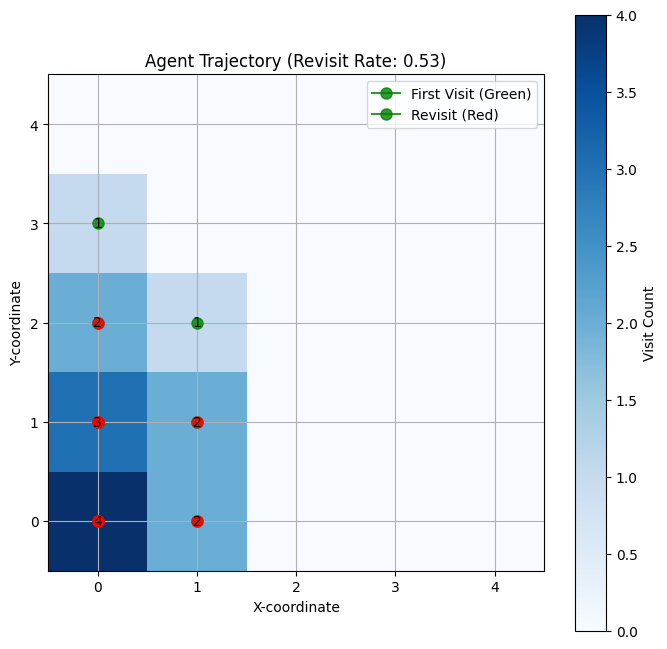

Trajectory Analysis:
  Total states visited: 15
  Unique states visited: 7
  Revisit rate: 0.53


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the environment grid
grid_size = (5, 5)  # Example grid of size 5x5
trajectory = [
    (0, 0), (0, 1), (0, 2), (0, 3), (0, 2),
    (0, 1), (0, 0), (1, 0), (1, 1), (1, 2),
    (1, 1), (1, 0), (0, 0), (0, 1), (0, 0)
]

# Extract x and y coordinates from the trajectory
x_coords, y_coords = zip(*trajectory)

# Analyze trajectory metrics
unique_states = set(trajectory)
total_visits = len(trajectory)
repeated_visits = total_visits - len(unique_states)
revisit_rate = repeated_visits / total_visits

# Create a grid for visit counts
visit_count_grid = np.zeros(grid_size)

# Mark visit counts and revisits
revisit_indices = []
for i, state in enumerate(trajectory):
    if visit_count_grid[state] > 0:
        revisit_indices.append(i)  # Track revisits
    visit_count_grid[state] += 1

# Plot the environment grid and trajectory
plt.figure(figsize=(8, 8))
plt.imshow(visit_count_grid.T, cmap="Blues", origin="lower", extent=[-0.5, grid_size[0] - 0.5, -0.5, grid_size[1] - 0.5])
plt.colorbar(label="Visit Count")

# Plot the trajectory
for i, (x, y) in enumerate(trajectory):
    color = "red" if i in revisit_indices else "green"
    plt.plot(x, y, color=color, marker="o", markersize=8, alpha=0.8)

# Add labels and annotations
plt.title(f"Agent Trajectory (Revisit Rate: {revisit_rate:.2f})")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.xticks(range(grid_size[0]))
plt.yticks(range(grid_size[1]))
plt.grid(True)

# Annotate visit counts
for x in range(grid_size[0]):
    for y in range(grid_size[1]):
        if visit_count_grid[x, y] > 0:
            plt.text(x, y, str(int(visit_count_grid[x, y])), ha="center", va="center", color="black")

# Display total and unique visits in the legend
plt.legend(["First Visit (Green)", "Revisit (Red)"], loc="upper right")

# Show the plot
plt.show()

# Print metrics
print("Trajectory Analysis:")
print(f"  Total states visited: {total_visits}")
print(f"  Unique states visited: {len(unique_states)}")
print(f"  Revisit rate: {revisit_rate:.2f}")


The trajectory analysis provided seems consistent with the information in the plot. Here's a breakdown of how it aligns:

1. **Total States Visited: 15**
   - The total number of steps (states visited) in the trajectory is 15. This is represented by the sum of all visit counts across the heatmap.

2. **Unique States Visited: 7**
   - The unique states are the distinct `(x, y)` coordinates visited in the trajectory. In the plot, we can count **7 unique grid cells** with either a green or red marker.

3. **Revisit Rate: 0.53**
   - The revisit rate is calculated as:
     \[
     \text{Revisit Rate} = \frac{\text{Total Visits} - \text{Unique States Visited}}{\text{Total Visits}}
     \]
     Substituting the values:
     \[
     \text{Revisit Rate} = \frac{15 - 7}{15} = 0.53
     \]

The analysis matches the data shown in the plot. If you'd like, I can verify or adjust the logic further based on any additional specifics you provide!